[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/predictive-clinical-neuroscience/BigDataCourse/blob/main/practicals/Big_data_mouse_practical_2020.ipynb)

# Big data : Mouse

The objectives of this exercise are to familiarize the students with the Allen Institute for Brain Science ([AIBS](https://portal.brain-map.org/)) Software Development Kit ([SDK](https://allensdk.readthedocs.io/en/latest/)).  
<br>
The Allen Institute for Brain Science is a research centre specialized in the generation and distribution of large datasets in neuroscience. In this exercise, we will explore one dataset: the [Mouse Brain Connectivity](https://connectivity.brain-map.org/).   
<br>
**References:** 
1. This exercise is heavily influenced by the [AIBS SDK example](https://allensdk.readthedocs.io/en/latest/examples.html)

2. *Julia M. Huntenburg, Ling Yun Yeow, Francesca Mandino, Joanes Grandjean, Gradients of functional connectivity in the mouse cortex reflect neocortical evolution, Neuorimage, 2020, https://doi.org/10.1016/j.neuroimage.2020.117528.*

3. *Julia M. Huntenburg, Gradients of functional connectivity in the mouse cortex reflect neocortical evolution, Github, https://github.com/juhuntenburg/mouse_gradients*

## Foreword and environment
This is a Jupyter notebook. This document combines both text (e.g. *this*), and executable code. These are organized into cells. This is a **text** cell. 

In [42]:
print('This is a code cell')
# This is a comment. The line above will be executed when you click on the 'play' icon on the left. The comment will not be executed. 

This is a code cell


## Environment basics
The default environment is Python3. You can check the version by running the 
code in the following cell. 

In [43]:
import platform  #the import function loads packages (a collection of functions) that isn't available within the default python environment. 

print(platform.python_version()) #the print function *prints* on screen the content therein. In this particular instance, it *prints* the content from the function `platform.python_version()`

3.6.9


## Editing cells. 
You can *Double-click* to edit the content of a cell. 
<br>
## Adding new cells.
By hovering your mouse above or below a cell, you can add either a *code* cell or a *text* cell
<br>
## Formating text.
You can add emphasis to your text using either the icons on top of the cell while editing, or using [Markdown](https://www.markdownguide.org/cheat-sheet/), a simple text-formating language. 
<br><br>
##### 100% optional (but so good!!)
While in Google Colab: Tools -> Settings -> Miscellaneous -> Corgi mode [x]


### Question 1
**Create a code cell, and have it print your name**

In [1]:
name = 'Jo'
print('My name is ', name)

My name is  Jo


## Environment: packages
By default, Google Colab will have a few packages installed. You can check them using the following cell. 

Please note the following. 
1. "!" This indicates that the following instructions need to be run outside python. This will be used to run commands in [bash](https://en.wikipedia.org/wiki/Bash_(Unix_shell)) 
2. "pip" is a python package installer
3. "pip list" instructs to list all packages currently installed in this session
4. "| tail" instructs to only list the last few packages

In [44]:
!pip list | tail 


wrapt                         1.12.1         
xarray                        0.15.1         
xgboost                       0.90           
xkit                          0.0.0          
xlrd                          1.1.0          
xlwt                          1.3.0          
yarl                          1.6.3          
yellowbrick                   0.9.1          
zict                          2.0.0          
zipp                          3.4.0          


## Environment: install Allen Institute for Brain Science Software Development Kit

Using "pip" we can install the "allensdk" package. While at it, we will also upgrade "pandas" a package to handle tables. Have a look at this [cheatsheet](http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3).

Following this, you will be asked to "restart runtime". Click on the corresponding icon at the bottom of the cell to do so.  

In [3]:
!pip install allensdk
!pip install --upgrade pandas
 

     |████████████████████████████████| 1.6MB 6.3MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 102kB 8.9MB/s 
     |████████████████████████████████| 7.4MB 15.3MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 3.0MB 41.1MB/s 
     |████████████████████████████████| 3.4MB 36.6MB/s 
     |████████████████████████████████| 42.5MB 90kB/s 
     |████████████████████████████████| 4.3MB 42.7MB/s 
     |████████████████████████████████| 10.4MB 45.7MB/s 
     |████████████████████████████████| 1.2MB 46.2MB/s 
     |████████████████████████████████| 133kB 47.9MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 133kB 49.6MB/s 
     |████████████████████████████████| 296kB 39.0MB/s 
     |████████████████████████████████| 153kB 35.8MB/s 
     |████████████████████████████████| 112kB 49.4MB/s 
     |████████████████████████████████| 552kB 40.9MB/s 

     |████████████████████████████████| 9.5MB 6.4MB/s 
ERROR: allensdk 2.3.2 has requirement pandas<=0.25.3,>=0.25.1, but you'll have pandas 1.1.4 which is incompatible.
  Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3


### Question 2
**Check that package 'matplotlib' is installed. (Hint: use !pip again).**
Write a code cell to do so. 


In [1]:
# using the grep function only shows the line that contains the desired package name
!pip list | grep matplotlib

matplotlib                    3.2.2          
matplotlib-venn               0.11.6         


## Demonstrating the AIBS connectivity database
To show the connectivity database, we are going to import the Allen SDK connectivity related functions. 

1. The get_experiments() function will download a table that lists all the experiments in that database. This is saved into the variable "all_experiments". 

2. To determine the number of experiments in that database, we use the **len()** function. 

3. Each experiment consists of a 3D reconstruction of the viral tracer injection and the areas of the brain where the tracer has been transported to, as well as meta-data.  

4. The table (all_experiments) contains the meta-data for all these experiments. 

5. Using the **iloc()** function, we can determine the n<sup>th</sup> item in the table. In python, the first item has an index at 0.



In [2]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache 

mcc = MouseConnectivityCache(resolution=100)

# open up a list of all of the experiments
all_experiments = mcc.get_experiments(dataframe=True)
print("%d total experiments" % len(all_experiments))

all_experiments.iloc[0]

2997 total experiments


gender                                                   F
injection_structures           [502, 926, 1084, 484682470]
injection_volume                                0.00665474
injection_x                                           9240
injection_y                                           3070
injection_z                                           8990
product_id                                               5
specimen_name                    Penk-IRES2-Cre-neo-249961
strain                                            C57BL/6J
structure_abbrev                                       SUB
structure_id                                           502
structure_name                                   Subiculum
transgenic_line                         Penk-IRES2-Cre-neo
transgenic_line_id                             2.98726e+08
id                                               527712447
primary_injection_structure                            502
Name: 527712447, dtype: object

### Question 3
**What is the gender of the mouse used in the 10<sup>th</sup> experiment listed in this table? What is the structure name where the tracer was injected into?**

In [3]:
# because python index starts at 0, the 10th element in a vector or an array is 9
all_experiments.iloc[9]

# The injection is in a male, the injection was done in the anteroventral nuc of the thalamus

gender                                                         M
injection_structures                                   [64, 255]
injection_volume                                       0.0246841
injection_x                                                 6070
injection_y                                                 3840
injection_z                                                 4650
product_id                                                    44
specimen_name                                  Ai75(T601)-337803
strain                                                      None
structure_abbrev                                              AV
structure_id                                                 255
structure_name                 Anteroventral nucleus of thalamus
transgenic_line                                     Ai75(RCL-nT)
transgenic_line_id                                   2.99864e+08
id                                                     614435699
primary_injection_structu

### Advanced user question (optional)
**What is the gender of the mouse in experiment ID 100142655 and into what brain structure was the tracer injected into? Hint: use the loc() function.**

In [4]:
all_experiments.loc[100142655]
#Male, Primary S1, Barrel field

gender                                                                M
injection_structures                         [329, 361, 369, 182305689]
injection_volume                                                0.17592
injection_x                                                        6920
injection_y                                                        1660
injection_z                                                        8020
product_id                                                            5
specimen_name                                                   378-850
strain                                                         C57BL/6J
structure_abbrev                                                SSp-bfd
structure_id                                                        329
structure_name                 Primary somatosensory area, barrel field
transgenic_line                                                    None
transgenic_line_id                                              

## Let's download one tracer map


In [5]:
experiment_id = 100142655

# projection density: number of projecting pixels / voxel volume
tracer = mcc.get_projection_density(experiment_id)
# We also download the reference template.
template = mcc.get_template_volume()

2020-11-30 20:47:17,888 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/100142655?image=projection_density&resolution=100
2020-11-30 20:47:18,600 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/average_template/average_template_100.nrrd


## Ploting the tracer
We can use packages numpy and matplotlib to represent the images into a picture in the axial plane. 

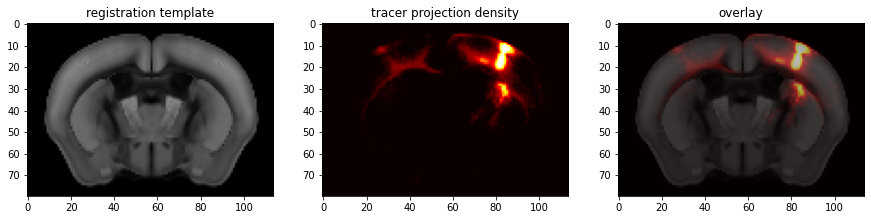

In [6]:
import numpy as np
import matplotlib.pyplot as plt

slice_idx = 60

f, ccf_axes = plt.subplots(1, 3, figsize=(15, 6))

#print(template[0][slice_idx,:,:])
ccf_axes[0].imshow(template[0][slice_idx,:,:], cmap='gray', aspect='equal', vmin=template[0].min(), vmax=template[0].max())
ccf_axes[0].set_title("registration template")

ccf_axes[1].imshow(tracer[0][slice_idx,:,:], cmap='hot', aspect='equal', vmin=0, vmax=tracer[0].max())
ccf_axes[1].set_title("tracer projection density")

ccf_axes[2].imshow(template[0][slice_idx,:,:], cmap='gray', aspect='equal', vmin=template[0].min(), vmax=template[0].max())
ccf_axes[2].imshow(tracer[0][slice_idx,:,:], cmap='hot', alpha=0.5, vmin=0, vmax=tracer[0].max())
ccf_axes[2].set_title("overlay")

plt.show()

Or we can do the same, but with a coronal plane

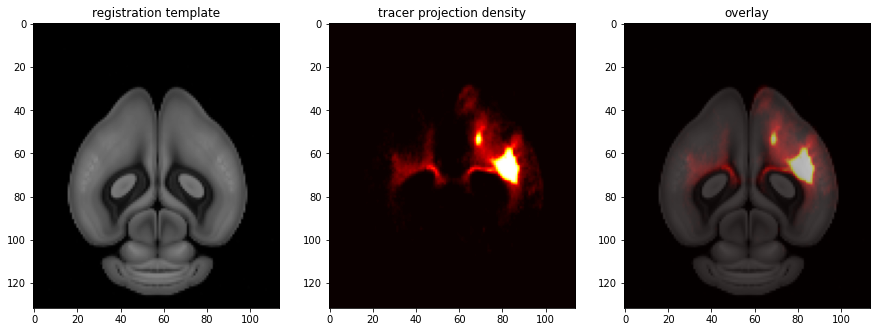

In [7]:
slice_idx = 15

f, ccf_axes = plt.subplots(1, 3, figsize=(15, 6))

#print(template[0][slice_idx,:,:])
ccf_axes[0].imshow(template[0][:,slice_idx,:], cmap='gray', aspect='equal', vmin=template[0].min(), vmax=template[0].max())
ccf_axes[0].set_title("registration template")

ccf_axes[1].imshow(tracer[0][:,slice_idx,:], cmap='hot', aspect='equal', vmin=0, vmax=tracer[0].max())
ccf_axes[1].set_title("tracer projection density")

ccf_axes[2].imshow(template[0][:,slice_idx,:], cmap='gray', aspect='equal', vmin=template[0].min(), vmax=template[0].max())
ccf_axes[2].imshow(tracer[0][:,slice_idx,:], cmap='hot', alpha=0.5, vmin=0, vmax=tracer[0].max())
ccf_axes[2].set_title("overlay")

plt.show()

### Question 4
**Can you change the code above to render an image in the sagittal plane instead? Hint: [slice_idx,:,:] is the  axial plane and [:,slice_idx,:] is the coronal plane.**

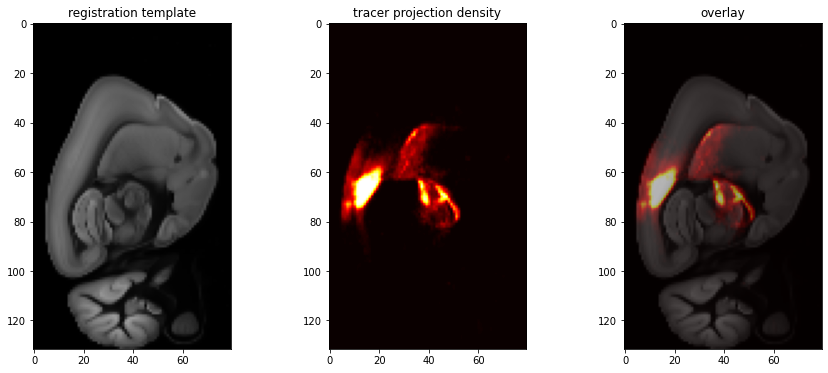

In [12]:
slice_idx = 80

f, ccf_axes = plt.subplots(1, 3, figsize=(15, 6))

#print(template[0][slice_idx,:,:])
ccf_axes[0].imshow(template[0][:,:,slice_idx], cmap='gray', aspect='equal', vmin=template[0].min(), vmax=template[0].max())
ccf_axes[0].set_title("registration template")

ccf_axes[1].imshow(tracer[0][:,:,slice_idx], cmap='hot', aspect='equal', vmin=0, vmax=tracer[0].max())
ccf_axes[1].set_title("tracer projection density")

ccf_axes[2].imshow(template[0][:,:,slice_idx], cmap='gray', aspect='equal', vmin=template[0].min(), vmax=template[0].max())
ccf_axes[2].imshow(tracer[0][:,:,slice_idx], cmap='hot', alpha=0.5, vmin=0, vmax=tracer[0].max())
ccf_axes[2].set_title("overlay")

plt.show()

## Let's examine the tracer data in detail using the AIBS regions-of-interest
You can find the brain annotation maps [here](https://atlas.brain-map.org/)

The structure tree is summarized using ontology ID codes. These define sub-sets of the regions-of-interest (ROI) tree for specific structures (e.g. isocortex), or at different level of granularity. 

Here are three examples.   
ID = 688152357 corresponds to summary ROIs in the isocortex.    
ID = 687527670 to major divisions in the brain.   
ID = 167587189 returns summary structures across the whole brain.

Presently we will use the isocortex structures only. 

In [13]:
# pandas for nice tables
import pandas as pd

# grab the StructureTree instance
structure_tree = mcc.get_structure_tree()

# Download the structure tree for the isocortex areas
summary_structures = pd.DataFrame(structure_tree.get_structures_by_set_id([688152357]))
summary_structures

,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
0,FRP,1,6,184,"Frontal pole, cerebral cortex","[997, 8, 567, 688, 695, 315, 184]","[3, 112905828, 688152357, 691663206, 687527945...","[38, 143, 69]"
1,MOp,1,18,985,Primary motor area,"[997, 8, 567, 688, 695, 315, 500, 985]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
2,MOs,1,24,993,Secondary motor area,"[997, 8, 567, 688, 695, 315, 500, 993]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
3,SSp-n,1,44,353,"Primary somatosensory area, nose","[997, 8, 567, 688, 695, 315, 453, 322, 353]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
4,SSp-bfd,1,51,329,"Primary somatosensory area, barrel field","[997, 8, 567, 688, 695, 315, 453, 322, 329]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
5,SSp-ll,1,65,337,"Primary somatosensory area, lower limb","[997, 8, 567, 688, 695, 315, 453, 322, 337]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
6,SSp-m,1,72,345,"Primary somatosensory area, mouth","[997, 8, 567, 688, 695, 315, 453, 322, 345]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
7,SSp-ul,1,79,369,"Primary somatosensory area, upper limb","[997, 8, 567, 688, 695, 315, 453, 322, 369]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
8,SSp-tr,1,86,361,"Primary somatosensory area, trunk","[997, 8, 567, 688, 695, 315, 453, 322, 361]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
9,SSp-un,1,93,182305689,"Primary somatosensory area, unassigned","[997, 8, 567, 688, 695, 315, 453, 322, 182305689]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"


### Advanced user question (optional)
**How many ROIs are there in the "summary structures" ontology?**

In [17]:
summary_structures2 = pd.DataFrame(structure_tree.get_structures_by_set_id([167587189]))
len(summary_structures2)

316

## Download the ROI-wise projection density 
In the cell above, we have defined a set of ROIs. This is saved into the "summary_structures" table. 

Below, we use the "get_projection_matrix" function to download the projection density in this sub-set of ROIs for the experiment "experiment_id". Note we can select one hemisphere or both. Most experiments in this database consists of tracers injected into the left hemisphere. 

We use matplotlib to represent the projection density in a color-coded format. 

/usr/local/lib/python3.6/dist-packages/allensdk/core/reference_space_cache.py:328: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  structure_ids[ii] = cls.validate_structure_id(sid)


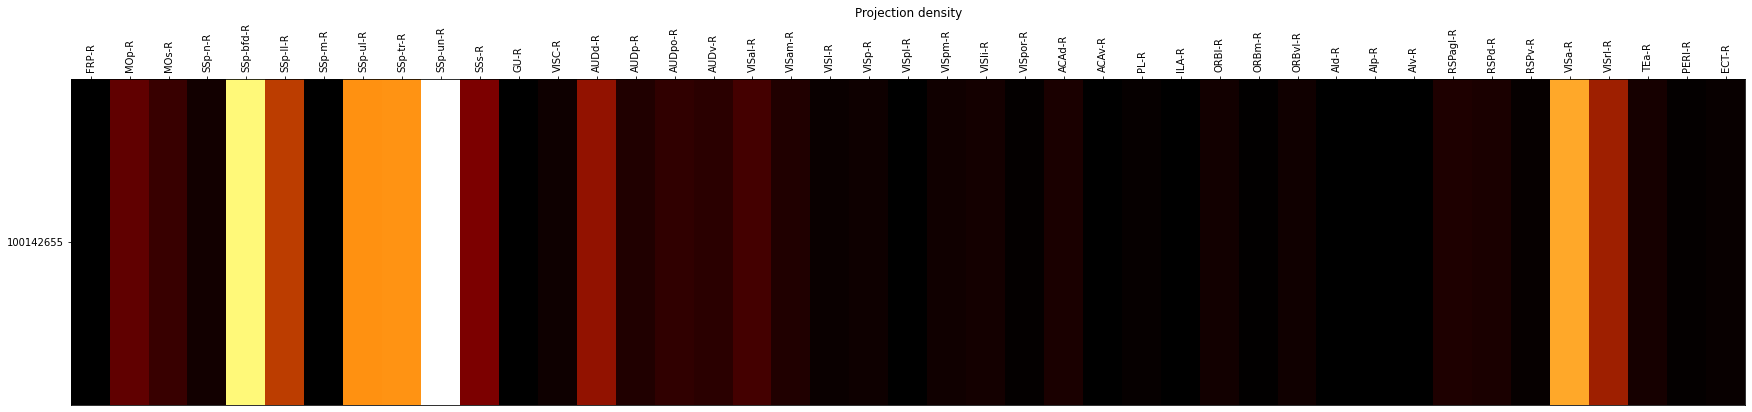

In [18]:
pm = mcc.get_projection_matrix(experiment_ids = [experiment_id], 
                               projection_structure_ids = summary_structures['id'],
                               hemisphere_ids= [2], # hemispheres. Left = 1, Right = 2, Both = 3
                               parameter = 'projection_density')

row_labels = pm['rows'] # these are just experiment ids
column_labels = [ c['label'] for c in pm['columns'] ] 
column_id = [ c['structure_id'] for c in pm['columns'] ] 
matrix = pm['matrix']

fig, ax = plt.subplots(figsize=(30,6))
heatmap = ax.pcolor(matrix, cmap=plt.cm.afmhot)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False,rotation=90)
ax.set_yticklabels(row_labels, minor=False)

ax.set_title("Projection density")

plt.show()



### Advanced user question (optional)
**Can you represent the distribution of projection intensity as a histogram? Hint: use the plt.hist() function and transpose the matrix with matrix.T**

(array([31.,  3.,  2.,  2.,  0.,  3.,  0.,  1.,  0.,  1.]),
 array([3.60822667e-04, 4.21014710e-02, 8.38421193e-02, 1.25582768e-01,
        1.67323416e-01, 2.09064064e-01, 2.50804712e-01, 2.92545361e-01,
        3.34286009e-01, 3.76026657e-01, 4.17767306e-01]),
 <a list of 10 Patch objects>)

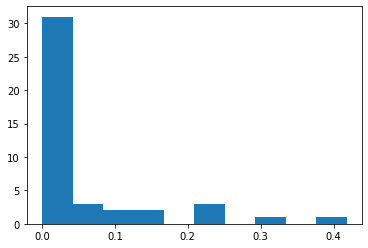

In [19]:
plt.hist(matrix.T)

### Question 5 
**Which ROI presents the highest projection density?**
Can you tell from the image? 
Can you extract the "projection_density" value from the "pm" table? 

In [20]:
d =  {'label': column_labels, 'density': pm['matrix'][0]}

df = pd.DataFrame(data = d)

print('Area expressing the highest projection density relative to injection site' , experiment_id)
print(df.label[df.density == df.density.max()])


Area expressing the highest projection density relative to injection site 100142655
9    SSp-un-R
Name: label, dtype: object


### Advanced user question (optional)
**Can you extract the name of the top 10% ROIs with the highest projection density? Hint: [here](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html)**

In [41]:
# find how many entries correspond to 10%
n10 = round(len(df)/10)
# find the top 10% density values
t10density = df.density.nlargest(n=n10)

# get the label
df.loc[df['density'].isin(t10density)]


,label,density
4,SSp-bfd-R,0.308198
8,SSp-tr-R,0.225015
9,SSp-un-R,0.417767
38,VISa-R,0.243052


## Congratulations. 
This is the end of the exercise. You should have learnt the following: 
1. Install and import a package with "pip"   
2. Basics of Numpy, Pandas, Matplotlib    
3. Interface with the AIBS SDK   
4. Download an experiment and represent it into an image or a plot   
